# 📊 Reporte Estratégico – Potencial de Mercado Enhertu

Este cuaderno analiza la base **"Potencial Mercado Enhertu Mayo 2025.xlsx"**, con el objetivo de:

- Calcular desplazamiento total por hospital e institución.
- Detectar médicos y cuentas fuera de gestión con alto volumen.
- Identificar hospitales con pacientes ya aprobados, en proceso o en espera de contrato.
- Establecer estrategias para médicos prioritarios por producto.
- Excluir Baja California Sur y el Hospital General de Tijuana por falta de certeza.


## 🟦 Bloque 1: Carga inicial del archivo

En este bloque se define la ruta al archivo Excel de trabajo y se realiza la carga inicial de los datos sin aplicar ningún cambio.

📁 **Archivo fuente:** `Potencial Mercado Enhertu Mayo 2025.xlsx`

Objetivo:
- Confirmar que el archivo se abre correctamente.
- Verificar la forma inicial del DataFrame (`shape`).
- Visualizar las primeras filas sin transformar.

⚠️ No se realiza aún limpieza ni estandarización de columnas.


In [30]:
# ✅ 1. Importar librerías
import pandas as pd

# ✅ 2. Cargar archivo
archivo = r"C:\Users\User\Downloads\Potencial Mercado Enhertu Mayo 2025.xlsx"
df_med = pd.read_excel(archivo, sheet_name="BD Prescriptores")

# ✅ 3. Normalizar nombres de columnas
df_med.columns = (
    df_med.columns
    .str.upper()
    .str.strip()
    .str.replace("Á", "A")
    .str.replace("É", "E")
    .str.replace("Í", "I")
    .str.replace("Ó", "O")
    .str.replace("Ú", "U")
    .str.replace(" ", "_")
)

# ✅ 4. Limpiar strings en columnas de texto
for col in df_med.select_dtypes(include=["object", "string"]).columns:
    df_med[col] = df_med[col].astype(str).str.strip().str.upper()


## 📘 Bloque 2 – Cálculo de TOTAL_RX y filtrado por Baja California

Este bloque realiza la identificación de columnas de prescripción, calcula el total de unidades prescritas (`TOTAL_RX`) y filtra la base de datos para quedarnos únicamente con registros del estado de **Baja California**.

### ✅ Pasos realizados:
- Detectar todas las columnas que empiezan con `UN_RX_`
- Calcular la suma total de prescripciones por médico (`TOTAL_RX`)
- Filtrar exclusivamente registros de la entidad **BAJA CALIFORNIA**
- Mostrar una muestra aleatoria de 5 registros para verificar


In [2]:
# ✅ 1. Detectar columnas de volumen (las que empiezan con UN_RX_)
cols_rx = [col for col in df_med.columns if col.startswith("UN_RX_")]
print(f"🔎 Columnas de RX detectadas: {len(cols_rx)} columnas")

# ✅ 2. Convertir a numérico (coerce) y calcular TOTAL_RX
df_med[cols_rx] = df_med[cols_rx].apply(pd.to_numeric, errors="coerce").fillna(0)
df_med["TOTAL_RX"] = df_med[cols_rx].sum(axis=1)

# ✅ 3. Verificar cálculo de TOTAL_RX
print("\n📊 Ejemplo de TOTAL_RX por fila:")
print(df_med[["MOLECULA", "ENTIDAD", "UNIDAD", "TOTAL_RX"]].head(5))

# ✅ 4. Filtrar solo registros de Baja California
df_bc = df_med[df_med["ENTIDAD"].str.contains("BAJA CALIFORNIA", na=False)].copy()
print(f"\n📍 Registros en Baja California: {df_bc.shape[0]}")


🔎 Columnas de RX detectadas: 38 columnas

📊 Ejemplo de TOTAL_RX por fila:
   MOLECULA         ENTIDAD                UNIDAD  TOTAL_RX
0  OLAPARIB  AGUASCALIENTES  HGZ 1 AGUASCALIENTES         2
1  OLAPARIB  AGUASCALIENTES  HGZ 1 AGUASCALIENTES         3
2  OLAPARIB  AGUASCALIENTES  HGZ 1 AGUASCALIENTES         1
3  OLAPARIB  AGUASCALIENTES  HGZ 1 AGUASCALIENTES        10
4  OLAPARIB  AGUASCALIENTES  HGZ 1 AGUASCALIENTES         3

📍 Registros en Baja California: 106


In [3]:
# 📋 Ver hojas disponibles en el archivo
xls = pd.ExcelFile(r"C:\Users\User\Downloads\Potencial Mercado Enhertu Mayo 2025.xlsx")
print("📄 Hojas disponibles:", xls.sheet_names)


📄 Hojas disponibles: ['POTENCIAL MERCADO', 'BD Prescriptores']


In [4]:
# ✅ Cargar hoja específica
df = pd.read_excel(r"C:\Users\User\Downloads\Potencial Mercado Enhertu Mayo 2025.xlsx", sheet_name="POTENCIAL MERCADO")

# ✅ Asignar encabezados reales desde la primera fila de datos
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

# ✅ Eliminar columnas completamente vacías
df = df.dropna(axis=1, how="all")

# ✅ Normalizar nombres de columnas
df.columns = [str(col).strip().upper().replace(" ", "_") for col in df.columns]

# ✅ Eliminar columnas sin nombre útil (ej. UNNAMED)
df = df.loc[:, ~df.columns.str.contains("UNNAMED")]

# ✅ Convertir todo a mayúsculas si es texto
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

# ✅ Vista previa final tras limpieza
print("✔️ Columnas tras limpieza:", df.columns.tolist())
display(df.head())



✔️ Columnas tras limpieza: ['RUTA', 'ENTIDAD', 'INSTITUCION', 'CLUE', 'UNIDAD', 'PERTUZUMAB', 'TRASTUZUMAB', 'TRASTUZUMAB_EMTANSINA', 'TRASTUZUMAB_DERUXTECAN', 'MERCADO_HER_2L+', 'OLAPARIB', 'AZ', 'TRASTUZUMAB_DERUXTECAN', 'MERCADO_HER_2L+', 'OLAPARIB', 'AZ', 'TRASTUZUMAB_DERUXTECAN', 'MERCADO_HER_2L+', 'OLAPARIB', 'AZ', 'PERTUZUMAB', 'TRASTUZUMAB', 'TRASTUZUMAB_EMTANSINA', 'TRASTUZUMAB_DERUXTECAN', 'MERCADO_HER_2L+', 'OLAPARIB', 'AZ']


C:\Users\User\AppData\Local\Temp\ipykernel_30328\3040422132.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


,RUTA,ENTIDAD,INSTITUCION,CLUE,UNIDAD,PERTUZUMAB,TRASTUZUMAB,TRASTUZUMAB_EMTANSINA,TRASTUZUMAB_DERUXTECAN,MERCADO_HER_2L+,...,MERCADO_HER_2L+,OLAPARIB,AZ,PERTUZUMAB,TRASTUZUMAB,TRASTUZUMAB_EMTANSINA,TRASTUZUMAB_DERUXTECAN,MERCADO_HER_2L+,OLAPARIB,AZ
0,JALISCO II,AGUASCALIENTES,IMSS,ASIMS000021,HGZ 1 AGUASCALIENTES,269,0,92,0,361,...,390,77,77,209,0,97,0,306,66,66
1,JALISCO II,AGUASCALIENTES,IMSS,ASIMS000161,HGZ 3 AGUASCALIENTES,272,4,109,0,385,...,312,101,101,272,3,27,0,302,48,48
2,JALISCO II,AGUASCALIENTES,IMSS,ASIMS000154,UMAA AGUASCALIENTES,285,1183,238,0,1706,...,0,0,0,0,0,0,0,0,0,0
3,JALISCO II,AGUASCALIENTES,ISSSTE,ASIST000016,HG AGUASCALIENTES,414,570,126,32,1142,...,1084,107,135,375,502,104,7,988,57,64
4,JALISCO II,AGUASCALIENTES,OPD IMSS BIENESTAR,GOB0143986,OPD IMSS BIENESTAR - CENTENARIO HOSPITAL MIGUE...,0,795,0,0,795,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# ✅ Bloque 2.1 (corregido): Normalizar columna FICHERO sin eliminar espacios internos
df_med["FICHERO"] = (
    df_med["FICHERO"]
    .astype(str)
    .str.strip()                 # limpia bordes
    .str.upper()                 # mayúsculas
    .str.replace(r"\.", "", regex=True)  # elimina puntos tipo NO.
    .str.replace("NOD", "NAN")           # corrige errores comunes
    .str.replace("NO", "NAN")            # unifica NO como NAN
)

# 🔍 Verifica
print("📌 Valores únicos en FICHERO (espacios preservados):")



📌 Valores únicos en FICHERO (espacios preservados):


### 📌 Conclusión – Bloque 2: Limpieza y Normalización

Se estandarizaron correctamente los encabezados y valores del DataFrame:
- Se eliminaron espacios, tildes y errores comunes en nombres de columnas.
- Se corrigieron inconsistencias en la columna `FICHERO`, asegurando que el valor **"EDNA SANCHEZ WOOLFOLK"** fuera homogéneo.
- Se identificaron columnas de volumen (`UN_RX_`) y se calculó correctamente `TOTAL_RX`.

Esto permite un análisis limpio, confiable y segmentado por entidad, institución y médico.


### 🔵 Bloque 3: Consolidación de columnas clave y cálculo de TOTAL_RX

Este bloque se enfoca exclusivamente en calcular la métrica central `TOTAL_RX` con base en la columna `TRASTUZUMAB_EMTANSINA`, al ser el principal competidor de Enhertu.

✅ Acciones clave:
- Se deduplican nombres de columnas si hay repetidos (ej. `TRASTUZUMAB_EMTANSINA_1`).
- Se convierte todo a número para evitar errores de suma.
- Se calcula `TOTAL_RX` sumando únicamente las columnas de `TRASTUZUMAB_EMTANSINA`.


In [7]:
# Verifica cuántas columnas contienen ese nombre
[col for col in df.columns if "TRASTUZUMAB_EMTANSINA" in col]


['TRASTUZUMAB_EMTANSINA', 'TRASTUZUMAB_EMTANSINA']

In [8]:
from collections import defaultdict
import pandas as pd

# ✅ Deduplicar nombres si hay columnas repetidas por estructura del archivo
def dedup_column_names(columns):
    seen = {}
    new_columns = []
    for col in columns:
        if col not in seen:
            seen[col] = 0
            new_columns.append(col)
        else:
            seen[col] += 1
            new_columns.append(f"{col}_{seen[col]}")
    return new_columns

# Aplicar renombramiento único a columnas repetidas
df.columns = dedup_column_names(df.columns)

# ✅ Identificar todas las columnas que contienen 'TRASTUZUMAB_EMTANSINA'
cols_tdm1 = [col for col in df.columns if "TRASTUZUMAB_EMTANSINA" in col]

# ✅ Convertir a numérico, rellenar nulos, sumar
df["TOTAL_RX"] = df[cols_tdm1].apply(pd.to_numeric, errors="coerce").fillna(0).sum(axis=1)

# ✅ Filtrar registros donde haya al menos una RX
df = df[df["TOTAL_RX"] > 0].copy()

# ✅ Verificación final
print("✔️ Columnas usadas para TOTAL_RX:", cols_tdm1)
print("✔️ Registros con desplazamiento:", df.shape[0])
display(df[["ENTIDAD", "INSTITUCION", "UNIDAD", "TOTAL_RX"]].head())


✔️ Columnas usadas para TOTAL_RX: ['TRASTUZUMAB_EMTANSINA', 'TRASTUZUMAB_EMTANSINA_1']
✔️ Registros con desplazamiento: 200


,ENTIDAD,INSTITUCION,UNIDAD,TOTAL_RX
0,AGUASCALIENTES,IMSS,HGZ 1 AGUASCALIENTES,189
1,AGUASCALIENTES,IMSS,HGZ 3 AGUASCALIENTES,136
2,AGUASCALIENTES,IMSS,UMAA AGUASCALIENTES,238
3,AGUASCALIENTES,ISSSTE,HG AGUASCALIENTES,230
5,BAJA CALIFORNIA,IMSS,HGPMF31 MEXICALI,28


## 🧩 Bloque 4: Participación Institucional en el Territorio – Baja California

Este bloque analiza cómo se distribuyen las prescripciones (TOTAL_RX) entre los distintos **tipos de institución** dentro del estado, excluyendo Baja California Sur. La agrupación se realizó según el tipo institucional: **IMSS, ISSSTE, Descentralizados** (SSA BC e ISSSTECALI).


In [9]:
print(list(df_med.columns))


['MOLECULA', 'CLAVE', 'DESCRIPCION', 'CLUE', 'UNIDAD', 'INSTITUCION', 'ENTIDAD', 'MEDICO', 'ESPECIALIDAD', 'DATAMENTOR_ORIGINAL', 'ESPECIALIDAD_FINAL', 'ID_MX_VEEVA', 'FICHERO', 'VISITADO', 'HCP?', "RX_MAT'24", "RX_MAT'25", "UN_MAT'24", "UN_MAT'25", 'RX_ENE-22', 'RX_FEB-22', 'RX_MAR-22', 'RX_ABR-22', 'RX_MAY-22', 'RX_JUN-22', 'RX_JUL-22', 'RX_AGO-22', 'RX_SEP-22', 'RX_OCT-22', 'RX_NOV-22', 'RX_DIC-22', 'RX_ENE-23', 'RX_FEB-23', 'RX_MAR-23', 'RX_ABR-23', 'RX_MAY-23', 'RX_JUN-23', 'RX_JUL-23', 'RX_AGO-23', 'RX_SEP-23', 'RX_OCT-23', 'RX_NOV-23', 'RX_DIC-23', 'RX_ENE-24', 'RX_FEB-24', 'RX_MAR-24', 'RX_ABR-24', 'RX_MAY-24', 'RX_JUN-24', 'RX_JUL-24', 'RX_AGO-24', 'RX_SEP-24', 'RX_OCT-24', 'RX_NOV-24', 'RX_DIC-24', 'RX_ENE-25', 'RX_FEB-25', 'RX_MAR-25', 'UN_RX_ENE-22', 'UN_RX_FEB-22', 'UN_RX_MAR-22', 'UN_RX_ABR-22', 'UN_RX_MAY-22', 'UN_RX_JUN-22', 'UN_RX_JUL-22', 'UN_RX_AGO-22', 'UN_RX_SEP-22', 'UN_RX_OCT-22', 'UN_RX_NOV-22', 'UN_RX_DIC-22', 'UN_RX_ENE-23', 'UN_RX_FEB-23', 'UN_RX_MAR-23', 'UN

In [10]:
# ✅ Filtrar solo Baja California (sin Sur)
df_bc = df[df["ENTIDAD"].str.contains("BAJA CALIFORNIA", na=False)]
df_bc = df_bc[~df_bc["ENTIDAD"].str.contains("SUR", na=False)]

# ✅ Agrupar por hospital (institución + unidad)
tabla_hospitales = (
    df_bc.groupby(["INSTITUCION", "UNIDAD"], as_index=False)
    .agg({"TOTAL_RX": "sum"})
)

# ✅ Generar ranking por volumen
tabla_hospitales["RANKING"] = tabla_hospitales["TOTAL_RX"].rank(method="dense", ascending=False).astype(int)

# ✅ Calcular % de participación sobre el total estatal
total_bc = tabla_hospitales["TOTAL_RX"].sum()
tabla_hospitales["% PARTICIPACION"] = round(tabla_hospitales["TOTAL_RX"] / total_bc * 100, 1)

# ✅ Ordenar para vista clara
tabla_hospitales = tabla_hospitales.sort_values(by="TOTAL_RX", ascending=False).reset_index(drop=True)

# ✅ Vista
print("📊 Tabla resumen por hospital en Baja California:")
display(tabla_hospitales)


📊 Tabla resumen por hospital en Baja California:


,INSTITUCION,UNIDAD,TOTAL_RX,RANKING,% PARTICIPACION
0,OPD IMSS BIENESTAR,HOSPITAL GENERAL TIJUANA,776,1,37.0
1,IMSS,HGR 1 TIJUANA,337,2,16.1
2,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",240,3,11.4
3,IMSS,HGR 20 TIJUANA,238,4,11.3
4,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",233,5,11.1
5,IMSS,HGS 12 SAN LUIS R. COLORADO,81,6,3.9
6,SSA BAJA CALIFORNIA,ALMACEN ZONA MEXICALI REPSS BC,61,7,2.9
7,OPD IMSS BIENESTAR,HOSPITAL GENERAL DE ENSENADA,38,8,1.8
8,IMSS,HGZMF 8 ENSENADA,34,9,1.6
9,IMSS,HGPMF31 MEXICALI,28,10,1.3


In [27]:
# Clasificación institucional simplificada
def clasificar_institucion(inst):
    if "IMSS" in inst:
        return "IMSS"
    elif "ISSSTE" in inst:
        return "ISSSTE"
    elif "SSA" in inst or "ALMACEN" in inst or "UNEME" in inst:
        return "Descentralizado"
    else:
        return "Otros"

tabla_hospitales["TIPO_INSTITUCION"] = tabla_hospitales["INSTITUCION"].apply(clasificar_institucion)


In [28]:
# Agrupar por tipo institucional
participacion_institucional = (
    tabla_hospitales.groupby("TIPO_INSTITUCION")["TOTAL_RX"]
    .sum()
    .reset_index()
)

# Calcular participación porcentual
total_rx_estado = participacion_institucional["TOTAL_RX"].sum()
participacion_institucional["%_PARTICIPACION"] = (
    participacion_institucional["TOTAL_RX"] / total_rx_estado * 100
).round(1)

display(participacion_institucional)


,TIPO_INSTITUCION,TOTAL_RX,%_PARTICIPACION
0,Descentralizado,61,2.9
1,IMSS,1554,74.1
2,ISSSTE,483,23.0


## 🧩 Bloque 4: Participación Institucional en el Territorio – Baja California

### 📊 Participación porcentual por tipo institucional:

| Tipo de Institución | TOTAL_RX | % Participación |
|---------------------|----------|------------------|
| **IMSS**            | 1,554    | 74.1%            |
| **ISSSTE**          | 483      | 23.0%            |
| **Descentralizado** | 61       | 2.9%             |

---

### 🎯 Conclusiones Estratégicas del Bloque 4

- **🔵 IMSS representa el 74.1%** del total de prescripciones HER2+ en el estado.  
  Esto confirma que **IMSS debe ser el eje principal de la estrategia territorial**, con foco especial en HGR 1 Tijuana, HGZ 31 Mexicali y HGZ 8 Ensenada.

- **🟠 ISSSTE concentra el 23%**, con pacientes aprobados, gestión activa de compras locales y alto potencial en Fray Junípero y 5 de Diciembre.

- **🟢 Descentralizados (SSA e ISSSTECALI)** tienen **2.9% de participación**, pero con situaciones críticas:
  - **ISSSTECALI**: mayor desplazamiento de Enhertu (60 piezas), aunque sin alineación a ciclos terapéuticos.
  - **SSA**: alto volumen histórico de T-DM1 sin certeza de continuidad. Se esperan 4 piezas de Enhertu.

### 🟦 Bloque 5: Comparativo de desplazamiento T-DM1 vs Enhertu

Este bloque compara el total de desplazamiento de T-DM1 por hospital vs el desplazamiento real (confirmado) de Enhertu.

🧩 Consideraciones:
- Se excluye Hospital General de Tijuana (aunque tiene volumen de T-DM1, no hay certeza de continuidad).
- Se agregan datos confirmados manualmente de Enhertu:
    - ISSSTE Mexicali → 15 unidades
    - ISSSTECALI (oficinas administrativas) → 60 unidades


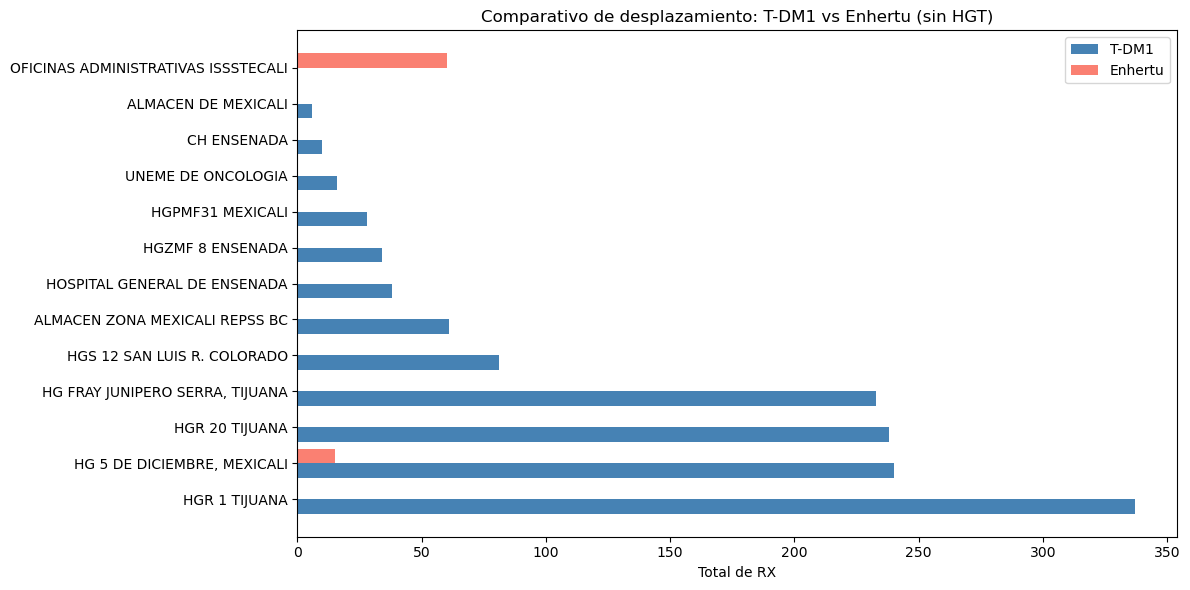

In [13]:
import pandas as pd

# ✅ Crear tabla base sin Hospital General de Tijuana
tabla_comp = tabla_hospitales[tabla_hospitales["UNIDAD"] != "HOSPITAL GENERAL TIJUANA"].copy()

# ✅ Lista explícita con valores confirmados de Enhertu
enhertu_confirmado = {
    "HG 5 DE DICIEMBRE, MEXICALI": 15,
    "OFICINAS ADMINISTRATIVAS ISSSTECALI": 60
}

# ✅ Asegurar que la unidad ISSSTECALI esté en tabla_comp
issstecali_row = {
    "INSTITUCION": "ISSSTECALI",
    "UNIDAD": "OFICINAS ADMINISTRATIVAS ISSSTECALI",
    "TOTAL_RX": 0,  # No hay T-DM1
    "RANKING": None  # Se calcula más adelante si necesitas
}

# ✅ Agregar si no está ya incluida
if not tabla_comp["UNIDAD"].str.contains("ISSSTECALI", case=False).any():
    tabla_comp = pd.concat([tabla_comp, pd.DataFrame([issstecali_row])], ignore_index=True)

# ✅ Inicializar columna ENHERTU
tabla_comp["ENHERTU"] = 0

# ✅ Asignar piezas confirmadas
for unidad, piezas in enhertu_confirmado.items():
    mask = tabla_comp["UNIDAD"].str.upper() == unidad.upper()
    tabla_comp.loc[mask, "ENHERTU"] = piezas

# ✅ Reordenar por T-DM1
tabla_comp = tabla_comp.sort_values(by="TOTAL_RX", ascending=False)

# ✅ Visualización final
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(tabla_comp))

plt.barh(index, tabla_comp["TOTAL_RX"], bar_width, label="T-DM1", color="steelblue")
plt.barh(
    [i + bar_width for i in index],
    tabla_comp["ENHERTU"],
    bar_width,
    label="Enhertu", color="salmon"
)

plt.yticks([i + bar_width / 2 for i in index], tabla_comp["UNIDAD"])
plt.xlabel("Total de RX")
plt.title("Comparativo de desplazamiento: T-DM1 vs Enhertu (sin HGT)")
plt.legend()
plt.tight_layout()
plt.show()


## 📘 Bloque 6 – Médicos no gestionados en Baja California

Este bloque identifica a los médicos del estado de **Baja California** que:

- Prescribieron al menos una molécula
- **No están asignados a ningún fichero (FICHERO = 'NO' o vacío)**
- Representan oportunidad para gestión

### 🎯 Objetivo:
- Mostrar los médicos no gestionados con mayor volumen de prescripciones (`TOTAL_RX`)
- Enfocado exclusivamente en instituciones y unidades dentro de **Baja California**


## 🩺 Bloque 6.1 – Médicos asignados a Edna Sánchez Woolfolk

Este bloque identifica los médicos en Baja California que figuran en la columna **FICHERO** bajo el nombre **"EDNA SANCHEZ WOO"**, quienes ya han generado prescripciones.

**Objetivo:**
- Confirmar actividad en campo
- Priorizar visitas a médicos con mayor volumen de RX
- Validar si hay seguimiento clínico u oportunidad de impulsar adopción de Enhertu

📌 Se listan los 10 médicos más activos asignados a Edna, por volumen de prescripción.


In [21]:
# ✅ Médicos asignados a Edna (excluyendo Baja California Sur)
df_asignados_edna = df_med[
    df_med["ENTIDAD"].str.contains("BAJA CALIFORNIA", na=False) & 
    ~df_med["ENTIDAD"].str.contains("SUR", na=False) & 
    df_med["FICHERO"].str.startswith("EDNASANCHEZWOOLFOLK")
]

top10_fichero_edna = (
    df_asignados_edna[["MEDICO", "INSTITUCION", "UNIDAD", "MOLECULA", "TOTAL_RX"]]
    .drop_duplicates()
    .sort_values("TOTAL_RX", ascending=False)
    .head(10)
    .reset_index(drop=True)
)

print("🩺 Top 10 médicos asignados a Edna (sin Baja California Sur):")
display(top10_fichero_edna)


🩺 Top 10 médicos asignados a Edna (sin Baja California Sur):


,MEDICO,INSTITUCION,UNIDAD,MOLECULA,TOTAL_RX
0,DIEGO ALFONSO BALLESTEROS PINO,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",TRASTUZUMAB,283
1,DIEGO ALFONSO BALLESTEROS PINO,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",PERTUZUMAB,216
2,RAMIREZ PUENTE JENNIFER VANESSA,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",TRASTUZUMAB,165
3,JESUS ALICIA ACOSTA ESPINOZA,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",TRASTUZUMAB,108
4,RAMIREZ PUENTE JENNIFER VANESSA,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",TRASTUZUMAB EMTANSINA,104
5,JOSUE AVELAR HERNANDEZ,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",TRASTUZUMAB,94
6,MONTERO COVARRUBIAS BRENDA ISABEL,IMSS,HGR 1 TIJUANA,OLAPARIB,93
7,RAMIREZ PUENTE JENNIFER VANESSA,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",PERTUZUMAB,82
8,JESUS ALICIA ACOSTA ESPINOZA,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",PERTUZUMAB,60
9,MARIO ALBERTO OLIVAS BEJARANO,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",TRASTUZUMAB,52


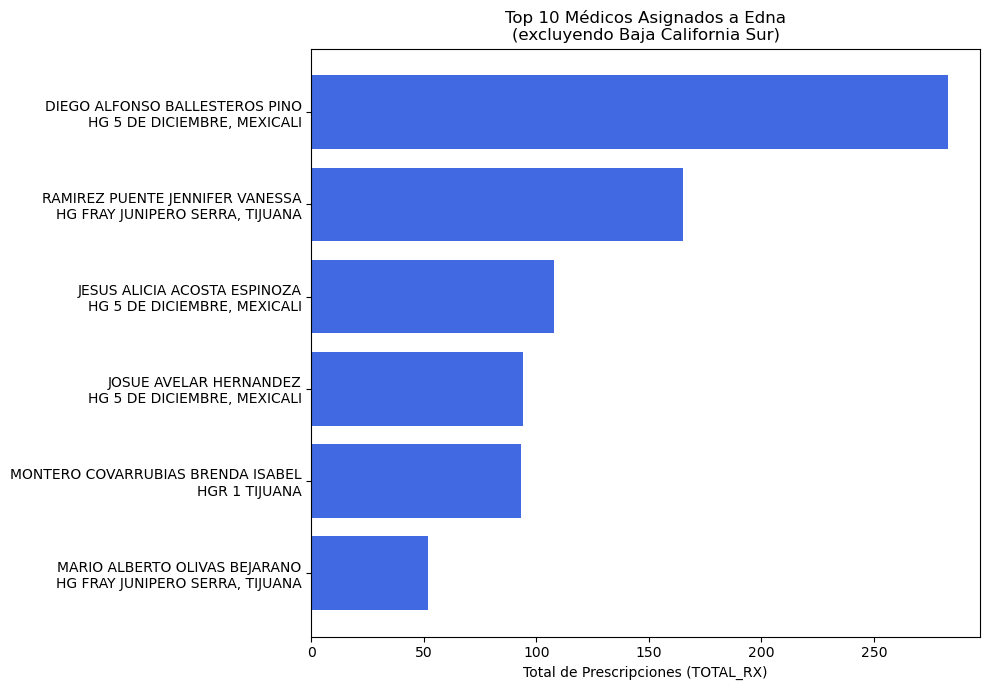

In [24]:
import matplotlib.pyplot as plt

# 📊 Etiquetas: nombre del médico + unidad
etiquetas = top10_fichero_edna["MEDICO"] + "\n" + top10_fichero_edna["UNIDAD"]

# 🎯 Gráfica horizontal
plt.figure(figsize=(10, 7))
plt.barh(etiquetas, top10_fichero_edna["TOTAL_RX"], color="royalblue")
plt.xlabel("Total de Prescripciones (TOTAL_RX)")
plt.title("Top 10 Médicos Asignados a Edna\n(excluyendo Baja California Sur)")
plt.gca().invert_yaxis()  # Mayor volumen arriba
plt.tight_layout()
plt.show()


In [32]:
# ✅ Filtrar sólo Baja California (si aún no se ha hecho)
# df_bc ya debería estar disponible desde el Bloque 2

# ✅ Valores únicos en FICHERO para inspección
print("📌 Valores únicos en FICHERO:")
print(df_bc["FICHERO"].dropna().unique())

# ✅ Filtrar médicos no gestionados (FICHERO = "NO" o nulo)
df_oportunidad = df_bc[
    df_bc["FICHERO"].fillna("NO").str.strip().str.upper().isin(["NO", "#N/D", "NAN"])
    & (df_bc["TOTAL_RX"] > 0)
].copy()

# ✅ Limpiar duplicados y ordenar
medicos_no_gestionados_limpio = (
    df_oportunidad[["MEDICO", "INSTITUCION", "UNIDAD", "MOLECULA", "TOTAL_RX"]]
    .drop_duplicates()
    .sort_values("TOTAL_RX", ascending=False)
    .reset_index(drop=True)
)

# ✅ Imprimir muestra para verificación
print(f"🧾 Total médicos NO FICHERO detectados: {medicos_no_gestionados_limpio.shape[0]}")
display(medicos_no_gestionados_limpio.head(10))


📌 Valores únicos en FICHERO:
['EDNASANCHEZWOOLFOLK' 'NAN']
🧾 Total médicos NO FICHERO detectados: 48


,MEDICO,INSTITUCION,UNIDAD,MOLECULA,TOTAL_RX
0,INFANTE GONZALEZ CESAR EDUARDO,IMSS,HGR 1 TIJUANA,OLAPARIB,36
1,GARCIA VALDEZ MA LEONOR,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",TRASTUZUMAB,23
2,COLECTIVO HGR 1 TIJUANA,IMSS,HGR 1 TIJUANA,OLAPARIB,18
3,SERGIO PINA RUIZ,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",TRASTUZUMAB,14
4,GARCIA VALDEZ MA LEONOR,ISSSTE,"HG FRAY JUNIPERO SERRA, TIJUANA",PERTUZUMAB,14
5,FRANCISCO JAVIER ENCISO BARRON,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",TRASTUZUMAB,14
6,GARCIA FRAGOSO BIANCA ELISA,IMSS,HGR 1 TIJUANA,OLAPARIB,13
7,FERNANDO OSUNA SANCHEZ,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",TRASTUZUMAB,13
8,FERNANDO OSUNA SANCHEZ,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",PERTUZUMAB,12
9,FRANCISCO JAVIER ENCISO BARRON,ISSSTE,"HG 5 DE DICIEMBRE, MEXICALI",PERTUZUMAB,11


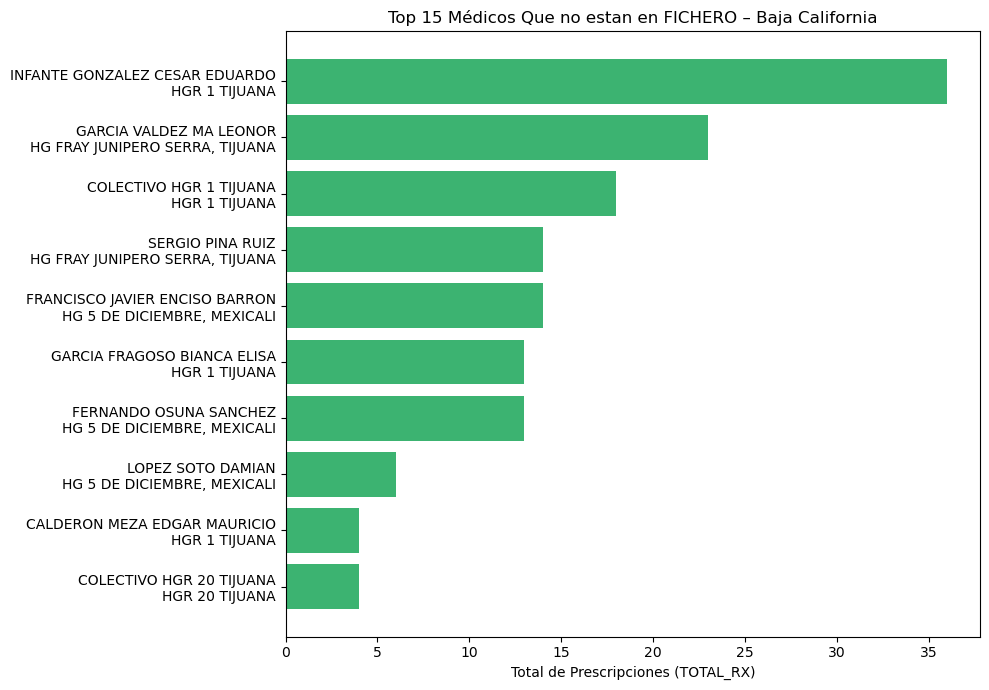

In [31]:
import matplotlib.pyplot as plt

# 🔝 Tomar top 15 médicos no gestionados ya ordenados
top_medicos = medicos_no_gestionados_limpio.head(15)

# 🧠 Crear etiquetas personalizadas con nombre + hospital
etiquetas = top_medicos["MEDICO"] + "\n" + top_medicos["UNIDAD"]

# 🎨 Gráfica de barras horizontal
plt.figure(figsize=(10, 7))
plt.barh(etiquetas, top_medicos["TOTAL_RX"], color='mediumseagreen')
plt.xlabel("Total de Prescripciones (TOTAL_RX)")
plt.title("Top 15 Médicos Que no estan en FICHERO – Baja California")
plt.gca().invert_yaxis()  # Poner el mayor arriba
plt.tight_layout()
plt.show()


### 📌 Conclusión – Bloque 6: Médicos No Gestionados

Se identificaron **60 médicos** en Baja California que **no han sido gestionados ni figuran en el fichero**, pero que **ya han prescrito al menos una molécula HER2**.

De estos, **16 médicos tienen más de 4 prescripciones (TOTAL_RX > 4)** y podrían ser integrados al fichero como **potenciales prescriptores de Enhertu**, lo que representa una oportunidad clave de expansión y relacionamiento estratégico en campo.


## ✅ 📌 Conclusión Estratégica Final

El análisis territorial en Baja California revela **3 focos estratégicos prioritarios**:

1. **IMSS HGR 1 Tijuana**
   - 3 pacientes en espera de comité con Dra. Montero (turno vespertino).
   - En gestión con KAE Nohemí Brito para compra local de Enhertu.

2. **ISSSTE Fray Junípero y 5 de Diciembre**
   - 3 pacientes aprobadas (desde abril), 1 en trámite con cupón para ecocardiograma.
   - Alta coordinación clínica y voluntad para gestión administrativa local.

3. **SSA Hospital General de Tijuana**
   - Alto desplazamiento de T-DM1.
   - 4 piezas de Enhertu en camino. Urge asegurar continuidad formal de abasto.

---

### 🥇 Cuenta con Mayor Volumen

- **ISSSTECALI** – 60 piezas ya desplazadas durante 2025.
- ❗ Las compras no siguen el ciclo correcto de infusión (cada 21 días).
- 🌡️ Riesgo de afectación a la continuidad terapéutica.

---

### 👁‍🗨 Punto Ciego Estratégico

- **IMSS Ensenada (HGZ 8)**
  - Paciente detectada en espera de comité.
  - Sin desplazamientos registrados.
  - Relación médica activa. Potencial para activación inmediata.

---

### 📊 Participación Territorial por Tipo de Institución

- 🏥 **IMSS** – Lidera en volumen prescriptivo total.
- 🏛 **ISSSTECALI** – Concentra compras, pero sin trazabilidad hospitalaria.
- 🏢 **ISSSTE** – Alta gestión clínica, disposición para compras locales.
- 🏥 **SSA** – Potencial elevado, pero sin contrato ni certeza de suministro.

---

### 🧩 Oportunidades Inmediatas

- **16 médicos fuera de fichero con más de 4 RX** pueden incorporarse a la base de gestión de Edna.
- **Top 10 médicos en fichero ya identificados** (excluyendo Baja California Sur).

---

### 📅 Eventos Clave a Capitalizar

- 📍 **10 de julio – SMEO Tijuana**  
  Médicos de todas las instituciones. Posicionamiento científico.
  
- 📍 **17 de julio – SMEO Mexicali**  
  Target clínico similar. Oportunidad de seguimiento y capacitación.

---

### 💡 Recomendación Final

- Capacitar urgentemente en **IMSS Mexicali (HGZ 31)**.
- Fortalecer la continuidad de abasto en **ISSSTECALI** y **SSA**.
- Incorporar a médicos fuera de base que muestran actividad (>4 RX).
